<a href="https://colab.research.google.com/github/19pa1a05c7/clustering-with-kmeans/blob/master/copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
covid=pd.read_csv("covid data.csv")
covid


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-27 22:14:55,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-27 22:14:55,30.295065,-92.414197,8,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-27 22:14:55,43.452658,-116.241552,54,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-27 22:14:55,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3424,NaN,NaN,NaN,Venezuela,2020-03-27 23:23:03,6.423800,-66.589700,107,1,31,75,Venezuela
3425,NaN,NaN,NaN,Vietnam,2020-03-27 23:23:03,14.058324,108.277199,163,0,20,143,Vietnam
3426,NaN,NaN,NaN,West Bank and Gaza,2020-03-27 23:23:03,31.952200,35.233200,91,1,17,73,West Bank and Gaza
3427,NaN,NaN,NaN,Zambia,2020-03-27 23:23:03,-13.133897,27.849332,22,0,0,22,Zambia


In [5]:
covid.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 12 columns):
FIPS              3149 non-null float64
Admin2            3173 non-null object
Province_State    3257 non-null object
Country_Region    3429 non-null object
Last_Update       3429 non-null object
Lat               3429 non-null float64
Long_             3429 non-null float64
Confirmed         3429 non-null int64
Deaths            3429 non-null int64
Recovered         3429 non-null int64
Active            3429 non-null int64
Combined_Key      3429 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 321.6+ KB


Columns like "FIPS","Admin2" and "Province_state" have NaN values.

In [7]:
covid.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,3149.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000
mean,30473.904732,36.883013,-82.892414,173.021581,7.931759,38.178769,96.704287
std,15293.508578,10.052155,38.974265,2568.134483,195.268929,1113.405936,1754.866647
min,1001.000000,-42.882100,-170.132000,0.000000,0.000000,0.000000,-6.000000
25%,18181.000000,33.964725,-97.647699,0.000000,0.000000,0.000000,0.000000
50%,29183.000000,38.078093,-89.115475,1.000000,0.000000,0.000000,0.000000
75%,45089.000000,41.742283,-81.802975,8.000000,0.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,86498.000000,9134.000000,61732.000000,66414.000000


# Dataframe cosisting each row is given for each place based on longitude coordinate

In [8]:
covid19=covid.iloc[:,6:10]
covid19

,Long_,Confirmed,Deaths,Recovered
0,-82.461707,4,0,0
1,-92.414197,8,1,0
2,-75.632346,2,0,0
3,-116.241552,54,0,0
4,-94.471059,1,0,0
...,...,...,...,...
3424,-66.589700,107,1,31
3425,108.277199,163,0,20
3426,35.233200,91,1,17
3427,27.849332,22,0,0


In [9]:
covid19.columns

Index(['Long_', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [10]:
x=covid19.iloc[:,1:4].values
x

array([[ 4,  0,  0],
       [ 8,  1,  0],
       [ 2,  0,  0],
       ...,
       [91,  1, 17],
       [22,  0,  0],
       [ 5,  1,  0]])

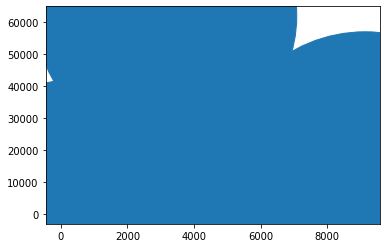

In [11]:
plt.scatter(x[:,1],x[:,2],s=x[:,0])

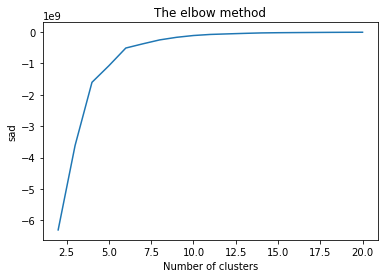

In [13]:
sad = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sad.append(kmeans.score(x))
plt.plot(range(2,21),sad)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sad')
plt.show()


In [14]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

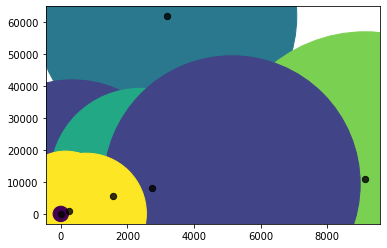

In [16]:
plt.scatter(x[:, 1], x[:, 2], c=y_kmeans, s=x[:,0],cmap="vir)
cen=kmeans.cluster_centers_
plt.scatter(cen[:,1],cen[:,2],c="black",s=40,alpha=0.8)

In [0]:
cen=kmeans.cluster_centers_
cen

array([[4.50172868e+01, 7.43334310e-01, 5.29270437e+00],
       [5.82950000e+04, 2.74000000e+03, 8.00750000e+03],
       [6.78010000e+04, 3.17400000e+03, 6.17320000e+04],
       [3.02896667e+04, 1.57966667e+03, 5.61100000e+03],
       [8.64980000e+04, 9.13400000e+03, 1.09500000e+04],
       [8.65433333e+03, 2.37111111e+02, 8.13444444e+02]])